In [0]:
## library import ##
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# **train data 데이터 탐색**

In [62]:
# data import #
experiment_result = pd.read_csv("train.csv", sep = '\t')

print(experiment_result.shape)
print("-----------------------------------------------------------------------------------------------------------------------------------")
print("---------------------------------------------------------------------------------------------------------------------------------")
print(experiment_result.info())


print("-----------------------------------------------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------------------------------------------")
print("\n")

print(experiment_result.columns)
print("-----------------------------------------------------------------------------------------------------------------------------------")
print(experiment_result.index)

(18, 1)
-----------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 1 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection  18 non-null     object
dtypes: object(1)
memory usage: 272.0+ bytes
None
-----------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------

In [63]:
## data import ##
experiment_result = pd.read_csv("train.csv")
experiment_result = experiment_result.fillna('no') ## 결측치 -> no 로 처리 
experiment_result.head()


,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,wax,6,4.0,unworn,yes,yes
1,2,wax,20,4.0,unworn,yes,yes
2,3,wax,6,3.0,unworn,yes,yes
3,4,wax,6,2.5,unworn,no,no
4,5,wax,20,3.0,unworn,no,no


In [64]:
experiment_result['feedrate'] = experiment_result['feedrate'].astype(str) # object형을 str로 변환
experiment_result.describe() #수치형 기초 통계량 확인

,No,clamp_pressure
count,18.000000,18.000000
mean,9.500000,3.416667
std,5.338539,0.624264
min,1.000000,2.500000
25%,5.250000,3.000000
50%,9.500000,3.500000
75%,13.750000,4.000000
max,18.000000,4.000000


# **experiment_01 데이터 탐색**

In [65]:
experiment_01 = pd.read_csv("experiment_01.csv")
print(experiment_01.columns)
experiment_01.head()


Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'Z1_CurrentFeedback', 'Z1_DCBusVoltage',
       'Z1_OutputCurrent', 'Z1_OutputVoltage', 'S1_ActualPosition',
       'S1_ActualVelocity', 'S1_ActualAcceleration', 'S1_CommandPosition',
       'S1_CommandVelocity', 'S1_CommandAcceleration', 'S1_CurrentFeedback',
       'S1_DCBusVoltage', 'S1_OutputCurrent', 'S1_OutputVolt

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.0,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.0,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.0,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.6,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.3,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.0,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.3,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.7,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.0,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.3,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.7,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.0,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.3,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.6,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.0,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep


# **EDA**

In [0]:
# 1. Feature count

# 2. pairplot

# 3. heatmap


In [67]:
print("##########################")
print("##### Feature Counts #####")
print("##########################")
for i in range(1, len(experiment_result.columns)):
    print("####### " + experiment_result.columns[i] + " #######")
    print(experiment_result.iloc[:,i].value_counts())

##########################
##### Feature Counts #####
##########################
####### material #######
wax    18
Name: material, dtype: int64
####### feedrate #######
3     6
20    5
6     5
15    1
12    1
Name: feedrate, dtype: int64
####### clamp_pressure #######
4.0    9
3.0    6
2.5    3
Name: clamp_pressure, dtype: int64
####### tool_condition #######
worn      10
unworn     8
Name: tool_condition, dtype: int64
####### machining_finalized #######
yes    14
no      4
Name: machining_finalized, dtype: int64
####### passed_visual_inspection #######
yes    10
no      8
Name: passed_visual_inspection, dtype: int64


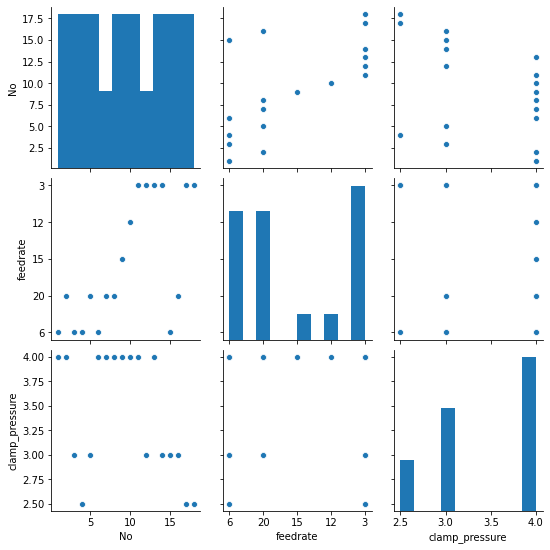

In [68]:
sns.pairplot(data = experiment_result)

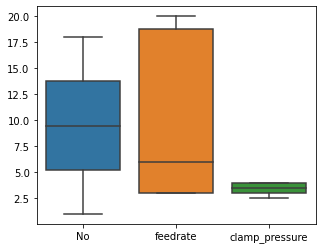

In [69]:
sns.boxplot(data = experiment_result)

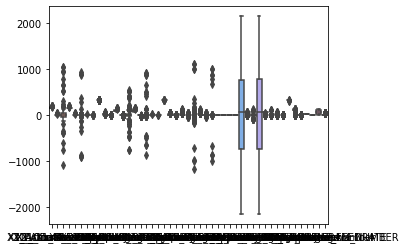

In [70]:
sns.boxplot(data = experiment_01)

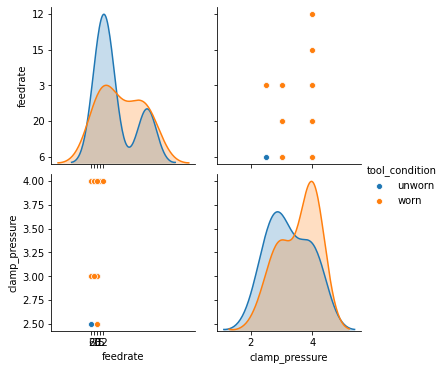

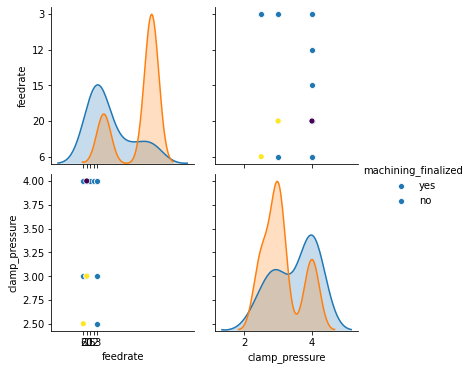

In [71]:
sns.pairplot(experiment_result, hue='tool_condition', vars=["feedrate","clamp_pressure"])
sns.pairplot(experiment_result, hue='machining_finalized', vars=["feedrate","clamp_pressure"])

In [72]:
print("##########################")
print("##### Feature Counts #####")
print("##########################")
for i in ['Machining_Process','M1_CURRENT_PROGRAM_NUMBER','M1_sequence_number','M1_CURRENT_FEEDRATE']:
    print("####### " + i + " #######")
    print(experiment_01[i].value_counts())

##########################
##### Feature Counts #####
##########################
####### Machining_Process #######
Layer 2 Up       203
Layer 3 Up       194
Layer 1 Up       172
Layer 1 Down     148
Layer 3 Down     142
Layer 2 Down     132
Prep              30
Repositioning     25
end                8
Starting           1
Name: Machining_Process, dtype: int64
####### M1_CURRENT_PROGRAM_NUMBER #######
1.0    1055
Name: M1_CURRENT_PROGRAM_NUMBER, dtype: int64
####### M1_sequence_number #######
2.0      102
70.0      30
111.0     30
45.0      29
29.0      29
        ... 
12.0       1
51.0       1
44.0       1
4.0        1
0.0        1
Name: M1_sequence_number, Length: 81, dtype: int64
####### M1_CURRENT_FEEDRATE #######
6.0     991
50.0     64
Name: M1_CURRENT_FEEDRATE, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

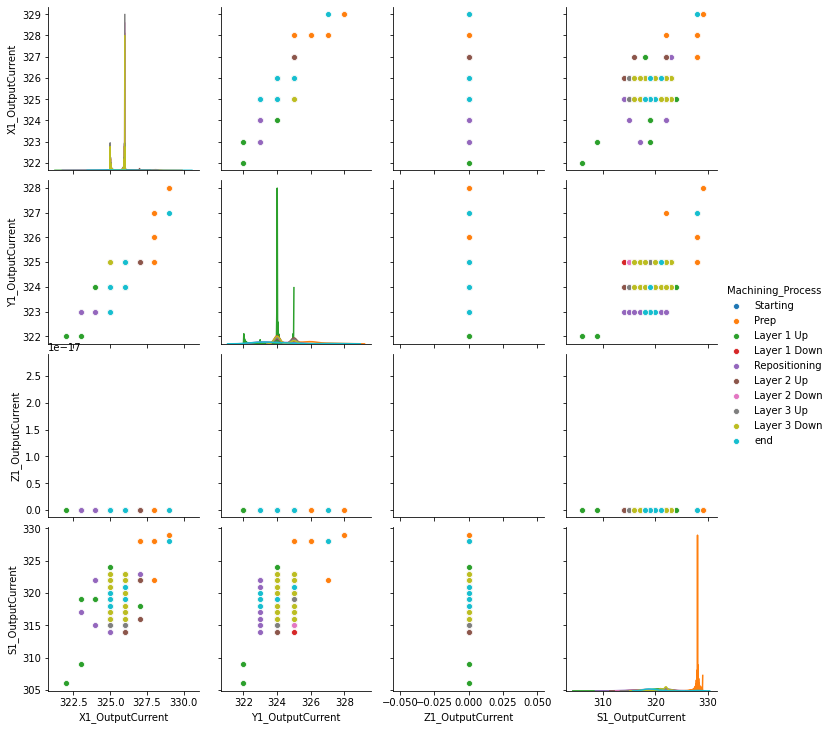

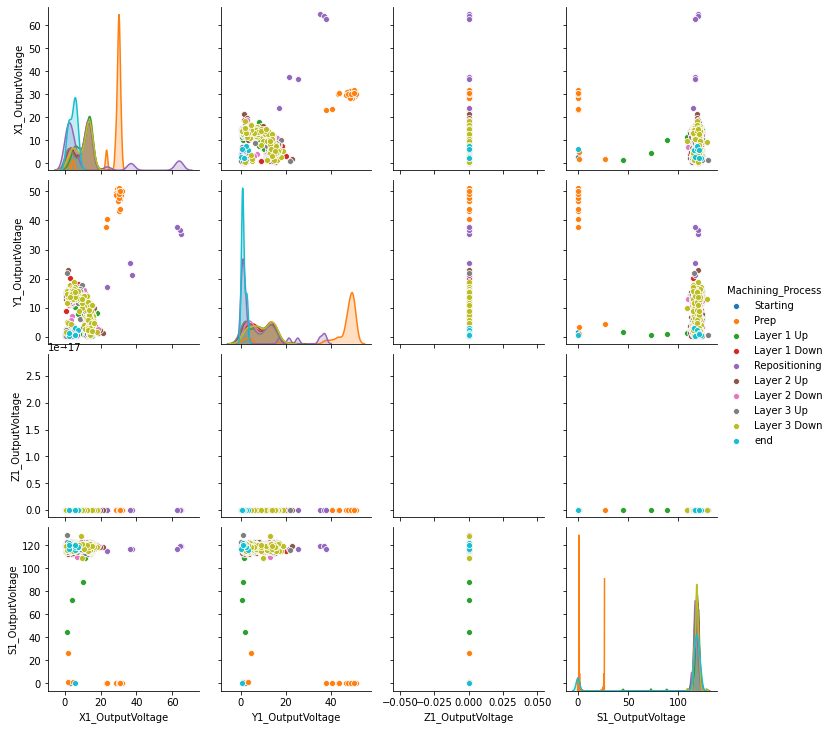

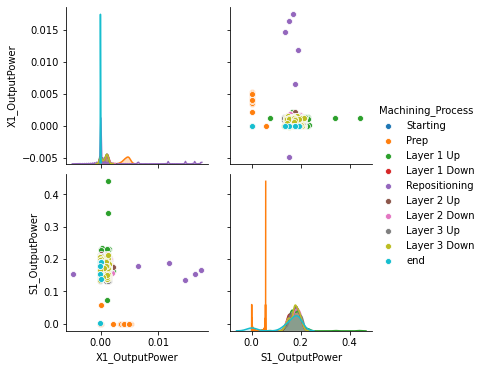

In [73]:
sns.pairplot(experiment_01, hue='Machining_Process', vars=['X1_OutputCurrent', 'Y1_OutputCurrent', 'Z1_OutputCurrent','S1_OutputCurrent']) # 가공마무리&전류 관계
sns.pairplot(experiment_01, hue='Machining_Process', vars=['X1_OutputVoltage', 'Y1_OutputVoltage', 'Z1_OutputVoltage','S1_OutputVoltage']) # 가공마무리&전압 관계
sns.pairplot(experiment_01, hue='Machining_Process', vars=['X1_OutputPower','S1_OutputPower']) # 가공마무리&출력동력 관계

소결론 : 가공마무리 & 전류 상관관계가 가장 높음

In [74]:
#########creating data frame#################

frames = list()

#load files
for i in range(1,19):
    exp_number = '0' + str(i) if i < 10 else str(i)
    frame = pd.read_csv("experiment_{}.csv".format(exp_number))

#load each experiment result
    row = experiment_result[experiment_result['No'] == i]

#add experiment settings to features
    frame['feedrate']=row.iloc[0]['feedrate']
    frame['clamp_pressure']=row.iloc[0]['clamp_pressure']
    
# Having label as 'tool_conidtion'
    
    frame['label'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
    frames.append(frame)

#encode 'Machining_Process'label to number
 
#split df into train/test data

#fit  & predict

df = pd.concat(frames, ignore_index = True)
df.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,label
0,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.0,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.0,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.0,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,6,4.0,0
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.6,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.3,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.0,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,6,4.0,0
2,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.3,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.7,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.0,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,6,4.0,0
3,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.3,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.7,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.0,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,6,4.0,0
4,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.3,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.6,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.0,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,6,4.0,0


In [75]:
df.shape

(25286, 51)

In [76]:
df.dtypes

X1_ActualPosition            float64
X1_ActualVelocity            float64
X1_ActualAcceleration        float64
X1_CommandPosition           float64
X1_CommandVelocity           float64
X1_CommandAcceleration       float64
X1_CurrentFeedback           float64
X1_DCBusVoltage              float64
X1_OutputCurrent             float64
X1_OutputVoltage             float64
X1_OutputPower               float64
Y1_ActualPosition            float64
Y1_ActualVelocity            float64
Y1_ActualAcceleration        float64
Y1_CommandPosition           float64
Y1_CommandVelocity           float64
Y1_CommandAcceleration       float64
Y1_CurrentFeedback           float64
Y1_DCBusVoltage              float64
Y1_OutputCurrent             float64
Y1_OutputVoltage             float64
Y1_OutputPower               float64
Z1_ActualPosition            float64
Z1_ActualVelocity            float64
Z1_ActualAcceleration        float64
Z1_CommandPosition           float64
Z1_CommandVelocity           float64
Z

In [77]:
# Convert 'Machining_process' into numerical values
pro={'Layer 1 Up':1,'Repositioning':2,'Layer 2 Up':3,'Layer 2 Up':4,'Layer 1 Down':5,'End':6,'Layer 2 Down':7,'Layer 3 Down':8,'Prep':9,'end':10,'Starting':11}

data=[df]

for dataset in data:
    dataset['Machining_Process']=dataset['Machining_Process'].map(pro)

df=df.drop(['Z1_CurrentFeedback','Z1_DCBusVoltage','Z1_OutputCurrent','Z1_OutputVoltage','S1_SystemInertia'],axis=1)

corm=df.corr()
corm

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,clamp_pressure,label
X1_ActualPosition,1.000000,-0.027925,-0.015813,0.999897,-0.030200,-0.022721,0.075901,-0.522043,0.349605,-0.290193,-0.080891,0.888528,-0.102731,-0.008712,0.888413,-0.103280,-0.005101,-0.131606,-0.341243,0.500171,-0.124481,0.033841,0.880043,-0.109356,-0.005602,0.879920,-0.109685,-0.006820,-0.103477,-0.663605,0.001704,-0.103584,-0.644630,-0.028627,-0.593782,-0.613660,0.530134,-0.644873,-0.626264,0.016684,-0.408106,0.436281,0.009185,0.108508,-0.091920
X1_ActualVelocity,-0.027925,1.000000,0.042899,-0.025593,0.994736,-0.054833,0.656705,-0.007850,-0.057059,0.063614,0.190011,0.012624,0.296476,-0.013794,0.013041,0.297780,0.004757,-0.038403,-0.056749,-0.022695,-0.102756,-0.085863,0.006283,0.237343,-0.002692,0.006709,0.237102,-0.004960,0.009144,0.064024,-0.020281,0.009154,0.062270,-0.055246,0.041381,0.041160,-0.035890,0.061762,0.048899,0.002800,0.020850,-0.021601,-0.017290,-0.017314,-0.008353
X1_ActualAcceleration,-0.015813,0.042899,1.000000,-0.015834,0.082456,0.389891,0.147840,0.078077,-0.016064,0.046832,0.107488,-0.005514,0.004232,-0.069679,-0.005500,0.000900,-0.042824,-0.000710,0.017137,-0.000308,0.009535,0.020056,0.001489,0.007526,0.008779,0.001510,0.008814,0.017044,-0.004451,-0.006438,-0.013959,-0.004453,-0.006917,-0.012156,-0.006727,-0.008171,0.003505,-0.007081,-0.002979,0.001840,-0.007341,0.015675,-0.013923,0.011408,0.004147
X1_CommandPosition,0.999897,-0.025593,-0.015834,1.000000,-0.027861,-0.022636,0.077469,-0.522235,0.349688,-0.290381,-0.080774,0.888720,-0.102159,-0.008735,0.888606,-0.102704,-0.005124,-0.131647,-0.341377,0.500264,-0.124810,0.033501,0.880197,-0.108794,-0.005579,0.880076,-0.109122,-0.006817,-0.103486,-0.663566,0.001694,-0.103592,-0.644593,-0.028754,-0.593789,-0.613666,0.530155,-0.644838,-0.626251,0.016690,-0.408173,0.436145,0.009137,0.108510,-0.092029
X1_CommandVelocity,-0.030200,0.994736,0.082456,-0.027861,1.000000,0.039428,0.676604,-0.001226,-0.058431,0.065110,0.198001,0.012194,0.296302,-0.018416,0.012610,0.296830,-0.002568,-0.039376,-0.053593,-0.023493,-0.101989,-0.085068,0.005361,0.236578,-0.000358,0.005786,0.236534,-0.001801,0.008275,0.064718,-0.020636,0.008285,0.063127,-0.056859,0.041457,0.041234,-0.036472,0.062592,0.049627,0.003463,0.020269,-0.021655,-0.017216,-0.017402,-0.008909
X1_CommandAcceleration,-0.022721,-0.054833,0.389891,-0.022636,0.039428,1.000000,0.126885,0.059561,-0.010022,0.016314,0.070454,-0.004594,-0.002265,-0.051468,-0.004601,-0.009045,-0.069560,-0.007101,0.022896,-0.002396,0.002139,0.002131,-0.004996,-0.002825,0.020034,-0.004998,-0.000946,0.030569,-0.005643,0.003370,-0.004164,-0.005645,0.004543,-0.017179,-0.002499,-0.002751,-0.002754,0.004140,0.003663,0.007051,-0.009969,0.004968,-0.005226,0.000844,-0.005586
X1_CurrentFeedback,0.075901,0.656705,0.147840,0.077469,0.676604,0.126885,1.000000,-0.013091,-0.076092,-0.009337,0.052380,0.045305,0.059434,-0.003931,0.045373,0.059384,-0.002817,-0.250374,0.001217,-0.047163,-0.045868,-0.064431,-0.028231,0.069257,0.001322,-0.028110,0.069609,0.003524,0.006330,0.104575,-0.009098,0.006338,0.108957,-0.031077,0.090606,0.091564,-0.078464,0.108385,0.097094,0.000687,0.047524,-0.107711,0.003780,-0.013569,-0.020931
X1_DCBusVoltage,-0.522043,-0.007

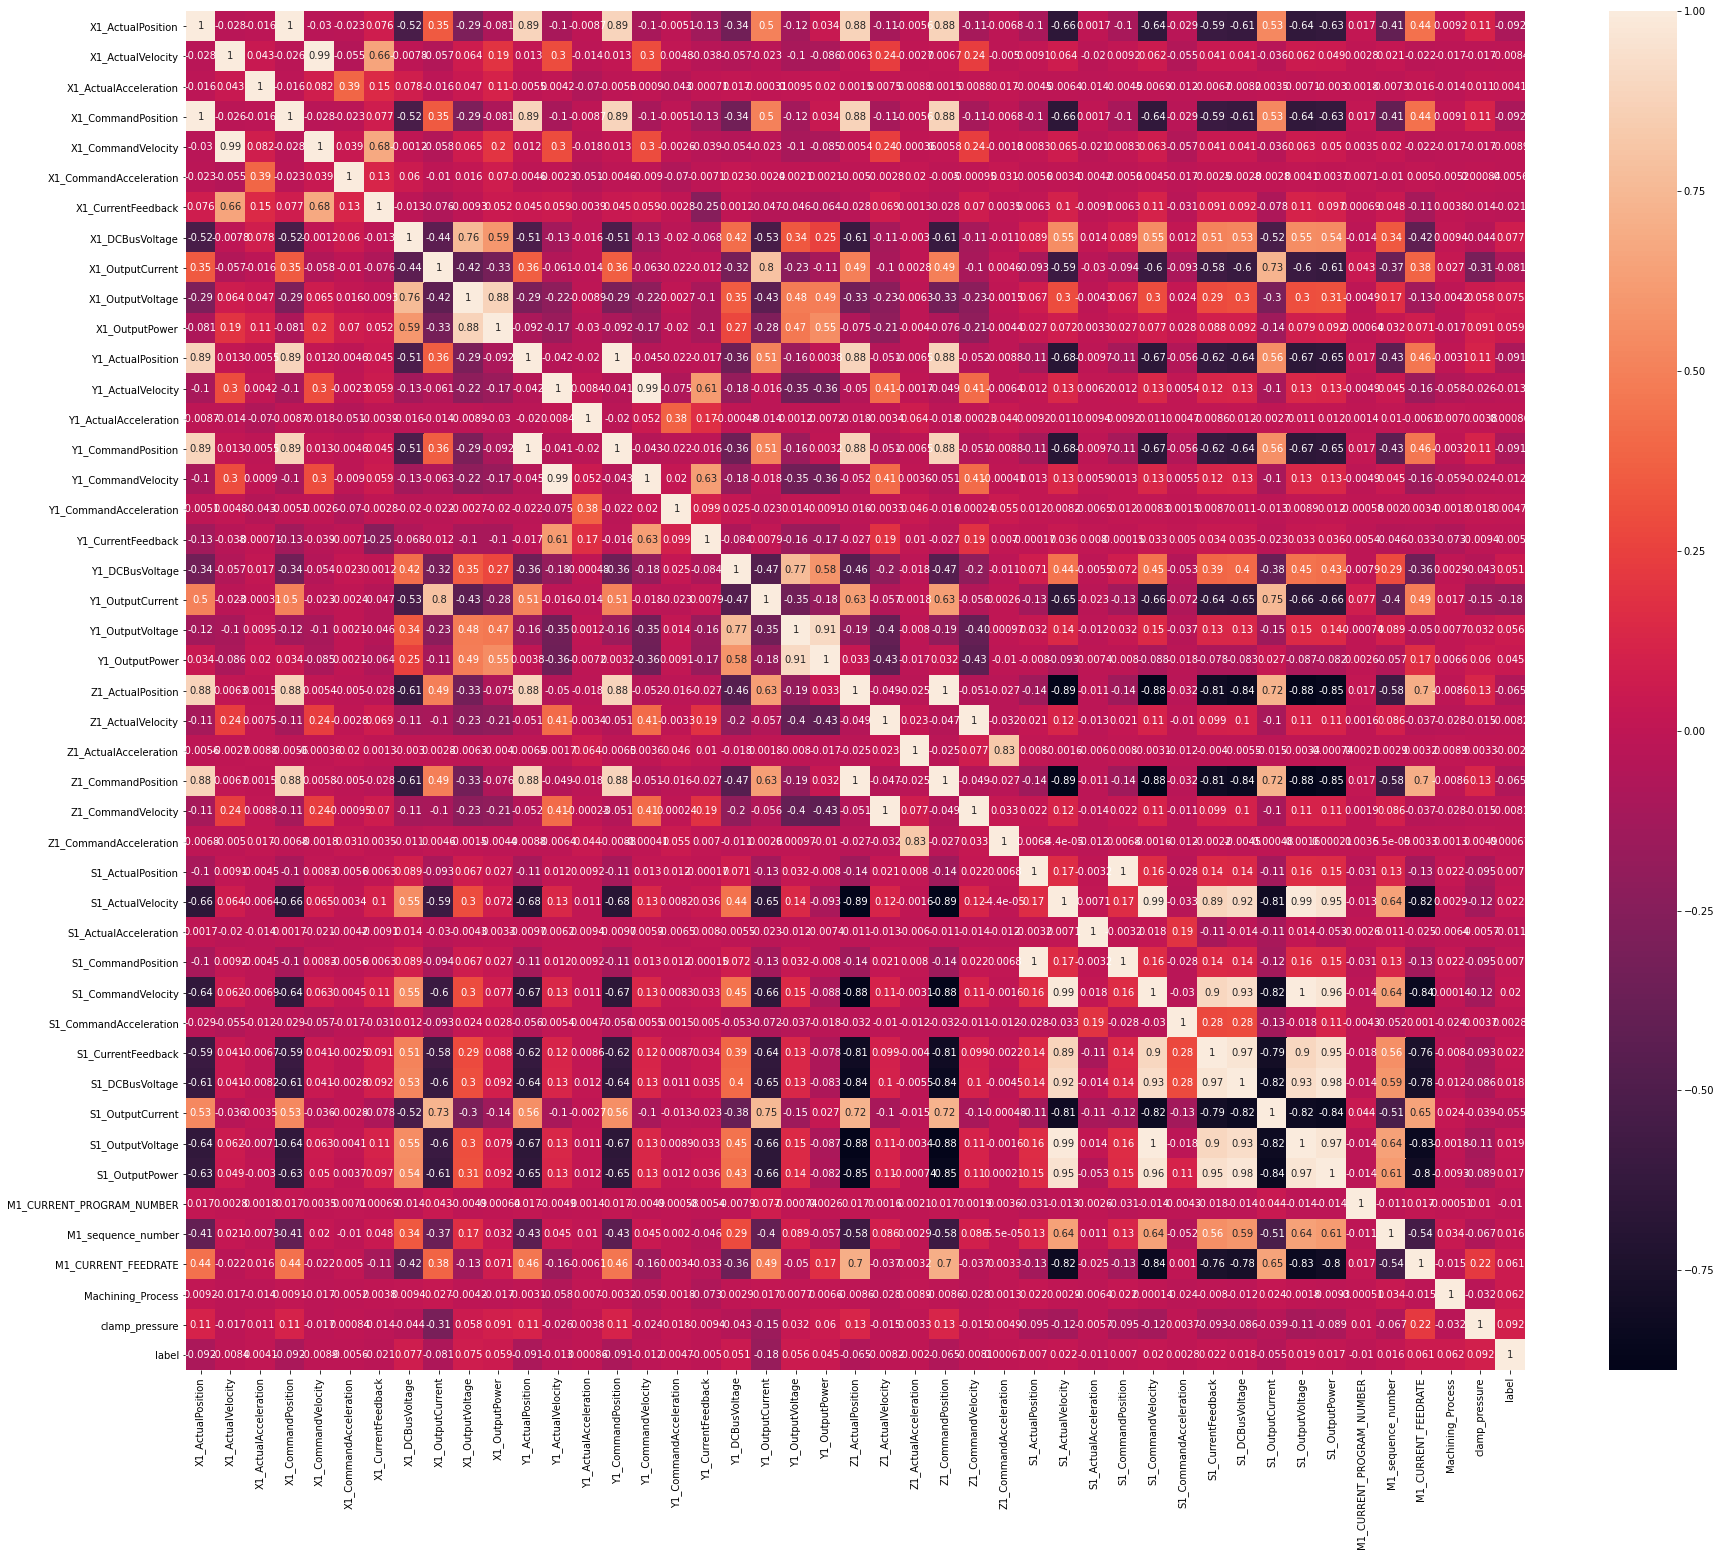

In [78]:
#checking the relationship between the variables by applying the correlation 
plt.figure(figsize=(30, 25))
p = sns.heatmap(df.corr(), annot=True)

# **모델링**

In [79]:
## building ML model ##
X=df.drop(['label','Machining_Process'],axis=1)
Y=df['label']
print('The dimension of X table is: ',X.shape,'\n')
print('The dimension of Y table is: ', Y.shape)

The dimension of X table is:  (25286, 44) 

The dimension of Y table is:  (25286,)


In [0]:
## train/test split ##
from sklearn.model_selection import train_test_split

#divided into testing and training
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [0]:
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# **SGD**

In [82]:
## SGD ##
sgd_model=SGDClassifier()
sgd_model.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
y_score = sgd_model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

Trained on 18964 observations and scoring with 6322 test samples.
Accuracy: 0.5656
F1 Score: 0.6335
Area under ROC curve: 0.5570


AUC : 0.557


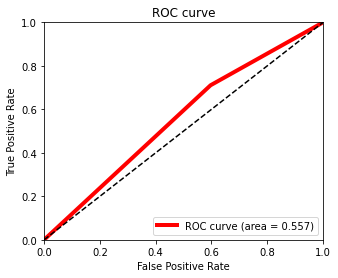

In [84]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

# **Random forest**

In [85]:
## random forest ##
rmf_model=RandomForestClassifier()
rmf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
y_score = rmf_model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

Trained on 18964 observations and scoring with 6322 test samples.
Accuracy: 0.9948
F1 Score: 0.9951
Area under ROC curve: 0.9946


AUC : 0.995


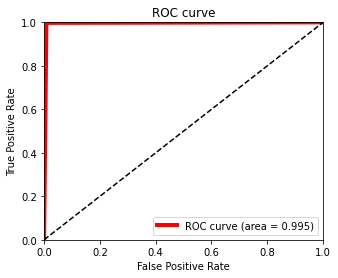

In [87]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

# **Logistic regression**

In [88]:
## logistic regression ##
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
y_score = log_reg.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

Trained on 18964 observations and scoring with 6322 test samples.
Accuracy: 0.5258
F1 Score: 0.5764
Area under ROC curve: 0.5207


AUC : 0.521


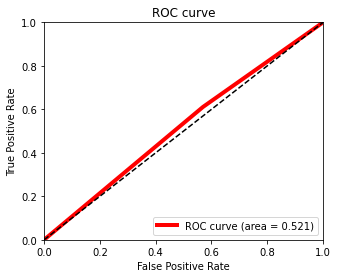

In [90]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

# **KNN**

In [91]:
## KNN(K nearest neighbor)
knb_model=KNeighborsClassifier()
knb_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [92]:
y_score = knb_model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

Trained on 18964 observations and scoring with 6322 test samples.
Accuracy: 0.7555
F1 Score: 0.7643
Area under ROC curve: 0.7557


AUC : 0.756


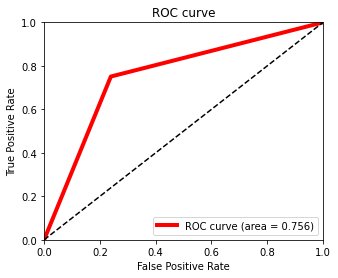

In [93]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

# **Linear SVM**

In [94]:
## Linear SVM ##
svm_model=LinearSVC()
svm_model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [95]:
y_score = svm_model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

Trained on 18964 observations and scoring with 6322 test samples.
Accuracy: 0.5373
F1 Score: 0.4503
Area under ROC curve: 0.5480


AUC : 0.548


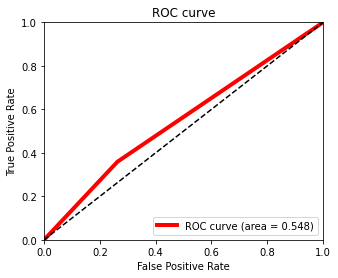

In [96]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

# **Decision tree**

In [97]:
DTC_model= DecisionTreeClassifier()
DTC_model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
y_score = svm_model.predict(x_test)
print("Trained on {0} observations and scoring with {1} test samples.".format(len(x_train), len(x_test)))
print("Accuracy: {0:0.4f}".format(accuracy_score(y_test, y_score)))
print("F1 Score: {0:0.4f}".format(f1_score(y_test, y_score)))
print("Area under ROC curve: {0:0.4f}".format(roc_auc_score(y_test, y_score)))

Trained on 18964 observations and scoring with 6322 test samples.
Accuracy: 0.5373
F1 Score: 0.4503
Area under ROC curve: 0.5480


AUC : 0.548


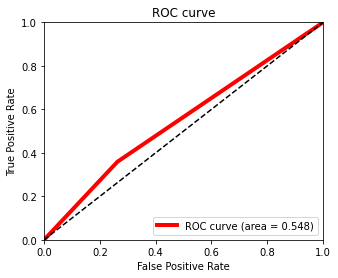

In [99]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)
print("AUC : %0.3f" % roc_auc)


plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, color='red', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

# **ACC score**

In [100]:
## which is the best model ##
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Stochastic Gradient Decent'],
    'Acc': [acc_svm_model, acc_knb_model, acc_log_reg, 
              acc_rmf_model,acc_sgd_model]
    })

result_df = results.sort_values(by='Acc', ascending=False)
result_df = result_df.set_index('Acc')
result_df

NameError: ignored